/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Predicted Class: Pass
Probability of Passing: 1.00
✅ Test data loaded successfully
Exam_Marks    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Exam_Marks  59 non-null     int64
dtypes: int64(1)
memory usage: 600.0 bytes
✅ Predictions saved to Predicted_student.csv successfully!
   Exam_Marks  Predicted_Pass  Pass_Probability Pass_Status
0          78               1        100.000000      ✅ Pass
1          40               0         47.094740      ❌ Fail
2          88               1        100.000000      ✅ Pass
3          68               1        100.000000      ✅ Pass
4          36               0          1.126738      ❌ Fail


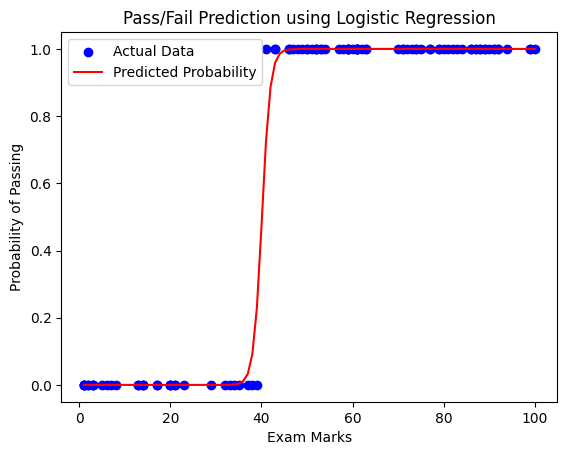

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Student Pass Fail Dataset.csv')
df.head()
# Clean column names (optional but useful)
df.columns = df.columns.str.strip()

# Encode 'Pass_Fail' into numeric (Pass = 1, Fail = 0)
df['Pass_Fail'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

# Define features (X) and target (y)
X = df[['Exam_Marks']]
y = df['Pass_Fail']

#slpit data 80 training data and 20 tst data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Example: Predict for a student with 60 marks
pred = model.predict([[60]])[0]
prob = model.predict_proba([[60]])[0][1]

print(f"Predicted Class: {'Pass' if pred == 1 else 'Fail'}")
print(f"Probability of Passing: {prob:.2f}")

# Save model
joblib.dump(model, 'student_pass_fail_model.pkl')

test_data = pd.read_csv("Test_data.csv")
print("✅ Test data loaded successfully" )
print(test_data.isnull().sum())
test_data.head()
test_data.info()

# Step 8: Predict on test data
X_test = test_data[['Exam_Marks']]
test_data['Predicted_Pass'] = model.predict(X_test)
test_data['Pass_Probability'] = model.predict_proba(X_test)[:, 1] * 100

# Step 9: Add readable labels
test_data['Pass_Status'] = test_data['Predicted_Pass'].apply(lambda x: "✅ Pass" if x == 1 else "❌ Fail")

# Step 10: Save predictions
test_data.to_csv("Predicted_student.csv", index=False)
print("✅ Predictions saved to Predicted_student.csv successfully!")

# Step 11: Preview results
print(test_data.head())

# Step 12: Plot logistic regression curve
# Plot the actual data points (Pass=1, Fail=0)
plt.scatter(df['Exam_Marks'], df['Pass_Fail'], color='blue', label='Actual Data')

# Plot the smooth logistic regression curve
plt.plot(X_plot, y_prob, color='red', label='Predicted Probability')

# Add labels and title
plt.xlabel('Exam Marks')
plt.ylabel('Probability of Passing')
plt.title('Pass/Fail Prediction using Logistic Regression')
plt.legend()

# Show the graph
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

 

In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Student Pass Fail Dataset.csv')
df.head()
# Clean column names (optional but useful)
df.columns = df.columns.str.strip()

# Encode 'Pass_Fail' into numeric (Pass = 1, Fail = 0)
df['Pass_Fail'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

# Define features (X) and target (y)
X = df[['Exam_Marks']]
Y = df['Pass_Fail']

#slpit data 80 training data and 20 tst data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,Y_train)
joblib.dump(model, 'student_result.pkl')
print("modle saved succefully")
#loaded model
loaded_model=joblib.load('student_result.pkl')
print("modle loaded succefully")
y_predict=loaded_model.predict(X_test)
print(y_predict)
print(Y_test)
print("Accuracy: ",accuracy_score(Y_test,y_predict))
print("Pressicion",precision_score(Y_test,y_predict))
print("Recall",recall_score(Y_test,y_predict))
print("F1 ",f1_score(Y_test,y_predict))
print("Confusion ",confusion_matrix(Y_test,y_predict))

test_data = pd.read_csv("Test_data.csv")
print("✅ Test data loaded successfully" )
print(test_data.isnull().sum())
test_data.head()
test_data.info()

X_test = test_data[['Exam_Marks']]
test_data['Predicted_Pass'] = model.predict(X_test)
test_data['Pass_Probability'] = (model.predict_proba(X_test)[:, 1] * 100).round(2)

# Step 9: Add readable labels
test_data['Pass_Status'] = test_data['Predicted_Pass'].apply(lambda x: " Pass" if x == 1 else " Fail")
test_data.to_csv("Predicted_student_result.csv", index=False)
print(" Predictions saved to Predicted_student.csv successfully!")
test_data.head()



modle saved succefully
modle loaded succefully
[0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1]
83    0
53    1
70    0
45    1
44    0
39    1
22    1
80    0
10    1
0     1
18    0
30    1
73    0
33    1
90    0
4     1
76    0
77    1
12    0
31    1
Name: Pass_Fail, dtype: int64
Accuracy:  1.0
Pressicion 1.0
Recall 1.0
F1  1.0
Confusion  [[ 9  0]
 [ 0 11]]
✅ Test data loaded successfully
Exam_Marks    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Exam_Marks  59 non-null     int64
dtypes: int64(1)
memory usage: 600.0 bytes
 Predictions saved to Predicted_student.csv successfully!


,Exam_Marks,Predicted_Pass,Pass_Probability,Pass_Status
0,78,1,100.00,Pass
1,40,0,47.21,Fail
2,88,1,100.00,Pass
3,68,1,100.00,Pass
4,36,0,1.18,Fail
